In [1]:
import pandas as pd
import numpy as np
import os 
os.chdir("E:/1ST SEM/eng/edwisor_assignments/19.nlp_yelp")

In [2]:
df=pd.read_csv("yelp.csv")

In [3]:
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [4]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
df['text length'] = df['text'].apply(len)

In [6]:
df['text length'].head()

0     889
1    1345
2      76
3     419
4     469
Name: text length, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

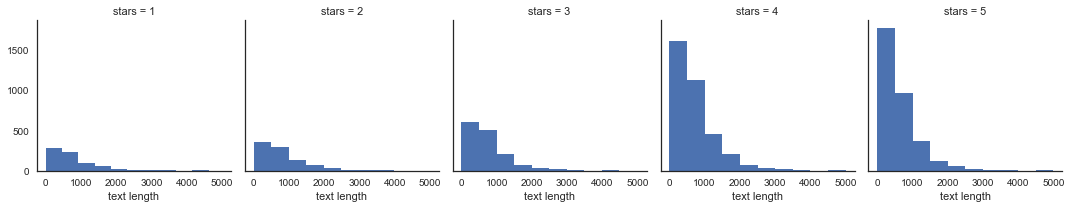

In [8]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

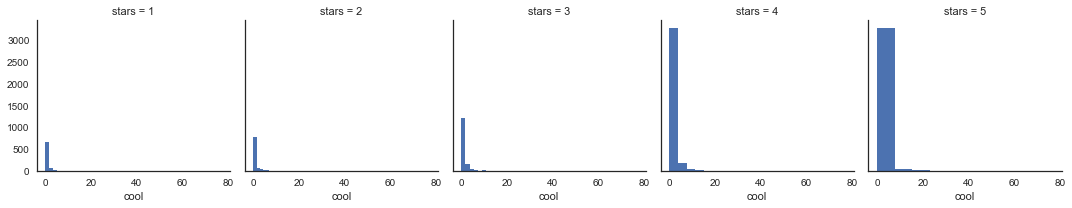

In [9]:
g=sns.FacetGrid(df,col='stars')
g.map(plt.hist,'cool')

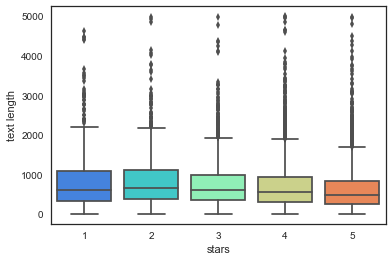

In [10]:
sns.boxplot(x='stars',y='text length',data=df,palette='rainbow')

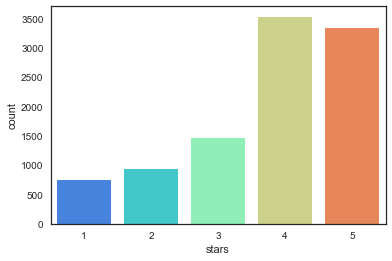

In [11]:
sns.countplot(x='stars',data=df,palette='rainbow')

In [12]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


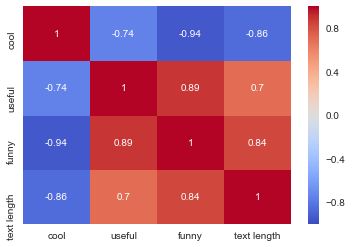

In [14]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [15]:
Custexp = []
for i in df['stars']:
    if (i == 1):
        Custexp.append('BAD')
    elif (i == 3) | (i == 2):
        Custexp.append('NEUTRAL')
    else:
        Custexp.append('GOOD')
        

df['Customer_experience'] = Custexp
df['Customer_experience'].value_counts()
df['Text length'] = df['text'].apply(lambda x:len(x.split()))


In [16]:
x = df['text']
y = df['Customer_experience']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [17]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string
import nltk
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [19]:
from nltk.corpus import stopwords
import string
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)

In [20]:
good = df[df['Customer_experience'] == 'GOOD']
bad = df[df['Customer_experience'] == 'BAD']
neu = df[df['Customer_experience'] == 'NEUTRAL']

In [21]:
good_bow = text_clean(good['text'])


In [22]:
bad_bow = text_clean(bad['text'])

In [23]:
neu_bow = text_clean(neu['text'])

In [24]:
good_para = ' '.join(good_bow)
bad_para = ' '.join(bad_bow)
new_para = ' '.join(neu_bow)

In [25]:
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

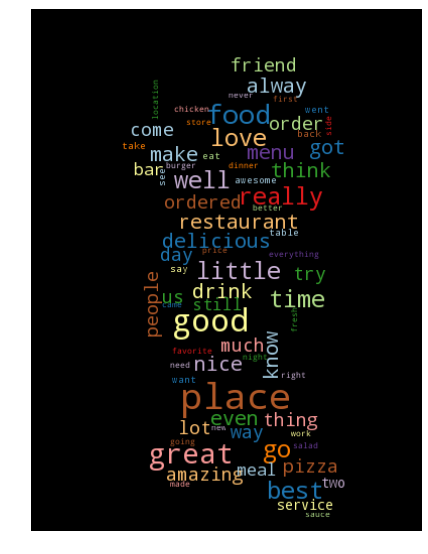

In [26]:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
mask_image = np.array(Image.open("images.png"))
wordcloud_good = WordCloud(colormap = "Paired",mask = mask_image, font_path =None, width = 30, height = 20, scale=2,max_words=1000, stopwords=stopwords)
wordcloud_good.generate(good_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,6))
plt.show()
wordcloud_good.to_file("good.png")

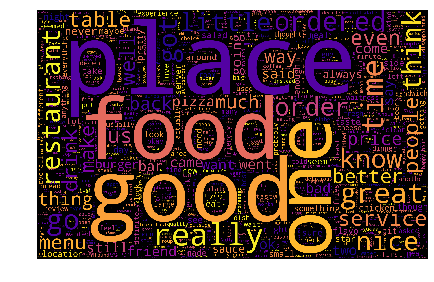

In [27]:
stopwords = set(STOPWORDS)
wordcloud_neu = WordCloud(colormap = "plasma",font_path = None, width = 1100, height = 700, scale=2,max_words=1000, stopwords=stopwords).generate(new_para)
plt.figure(figsize = (7,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')